In [1154]:
import pylab
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stat 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix,classification_report

In [1150]:
#QQ Plot
import pylab
import scipy.stats as stat 

def Gaus_check(df,col):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[col].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[col],dist='norm',plot=pylab)
    plt.show()

In [1055]:
df=pd.read_csv("tit_train.csv")
df_test=pd.read_csv("tit_test.csv") 

In [493]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [110]:
print(test_data.info())
print(test_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [111]:
df1=df

## EDA

###### Checking for balanced or imbalanced data?

In [1133]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

since the ration is 60:40 , can be considered as balanced data

In [112]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [113]:
print(train_data["Pclass"].unique())

[3 1 2]


In [114]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

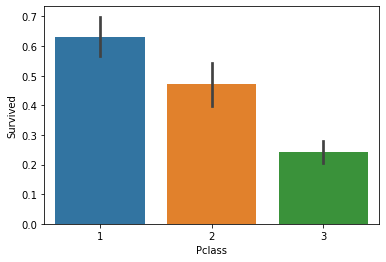

In [115]:
sns.barplot(x=train_data.Pclass,y=train_data['Survived'])

# Sex

In [116]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [117]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

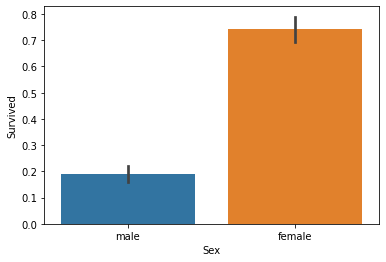

In [118]:
sns.barplot(x=train_data.Sex,y=train_data.Survived)

# SibSp-Number of Siblings or Spouse abroad

In [119]:
train_data['SibSp'].unique()
len(train_data['SibSp'].unique())
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)
#train_data[['Fare','Survived']].groupby(['Fare']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

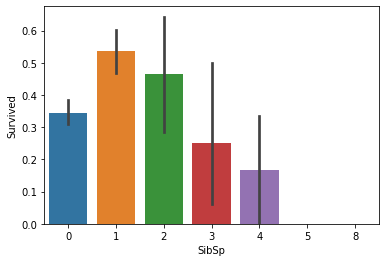

In [120]:
sns.barplot(x=train_data.SibSp,y=train_data.Survived)

# Parch -Number of member in Family of Parent and Childer

In [121]:
train_data['Parch'].unique()
len(train_data['Parch'].unique())
train_data[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by="Survived",ascending =True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

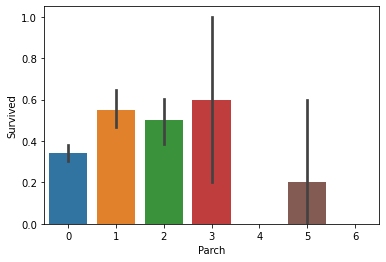

In [122]:
sns.barplot(x=train_data.Parch,y=train_data.Survived)

# FARE

In [123]:
train_data.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

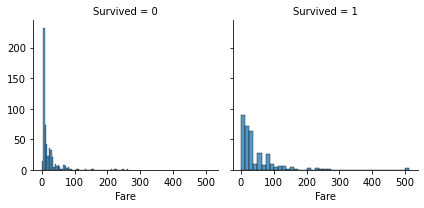

In [124]:
fare_plot = sns.FacetGrid(train_data, col='Survived')
#g = g.map(sns.distplot, "Fare")
fare_plot = fare_plot.map(sns.histplot, "Fare")


The graph is still not clear because of larger range of Fare value, so taken a log of each value to make the range much smaller for more clearer visualization
Also, if we closely observe there is a skew , a small group with Fare 500. So taking the log will help to reduce the skew as well.

In [125]:
#you should import numpy before executing this session
train_data["Fare"] = train_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test_data["Fare"] = test_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

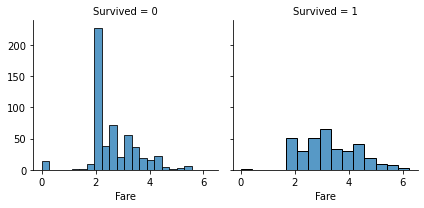

In [126]:
fare_plot=sns.FacetGrid(train_data,col='Survived')
fare_plot=fare_plot.map(sns.histplot,"Fare")

# 'Embarked'

In [127]:
train_data['Embarked'].isna().sum() #this gives the result only two missing values 

2

In [128]:
train_data[['Embarked','Survived']].groupby('Embarked').mean().sort_values("Survived",ascending =False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

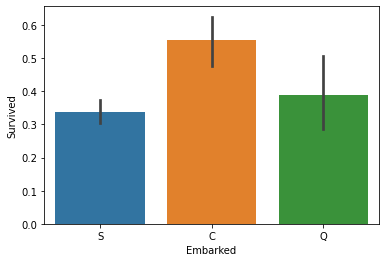

In [129]:
sns.barplot(x=train_data.Embarked,y=train_data.Survived)

In [130]:
train_data['Embarked'].isna().sum() ##this gives the result only two missing values

2

In [131]:
Filling missing values in both train and test with S

SyntaxError: invalid syntax (<ipython-input-131-6e58928b44ae>, line 1)

## FILLNA

<AxesSubplot:>

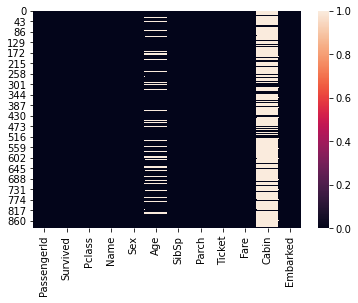

In [626]:
sns.heatmap(df.isnull())

In [630]:
for i in dft.columns:
    print(i,dft[i].isnull().sum())

PassengerId 0
Survived 418
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 1014
Embarked 2


To handle fill nan values , join both the datas together 

###### Combining train and test for effective Nan Fill

In [1056]:
df['Train_marking']='Train'

In [1057]:
df_test['Train_marking']='Test'

In [1058]:
dft=pd.concat([df,df_test])

In [1059]:
dft.reset_index(inplace=True)

In [1060]:
df1=dft

##### AGE

In [1061]:
dft['Age'].isnull().sum()

263

<AxesSubplot:xlabel='Sex', ylabel='Age'>

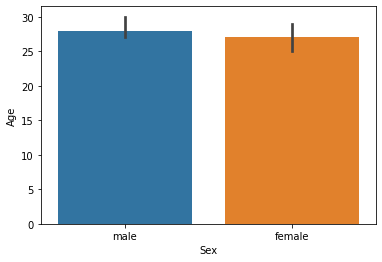

In [1062]:
sns.barplot(x=dft['Sex'],y=dft['Age'],estimator=median)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

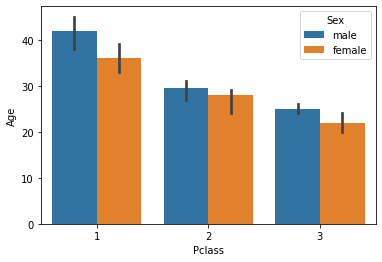

In [1063]:
from numpy import median
sns.barplot(x=dft['Pclass'],y=dft['Age'],hue=dft['Sex'],estimator=median)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

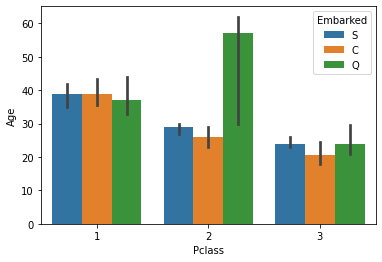

In [1064]:
sns.barplot(data=dft,x='Pclass',y='Age',hue='Embarked',estimator=median)

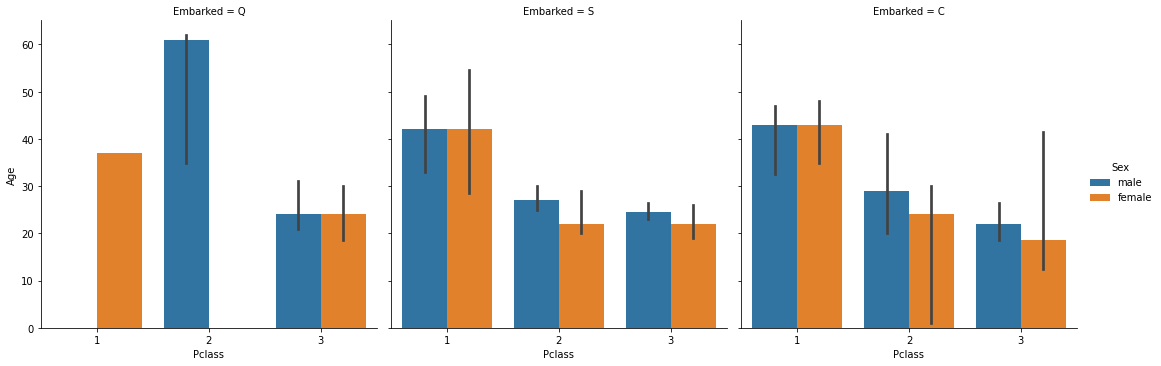

In [1065]:
sns.catplot(data=df_test,x='Pclass',y='Age',hue='Sex',col='Embarked',kind='bar',estimator=median)

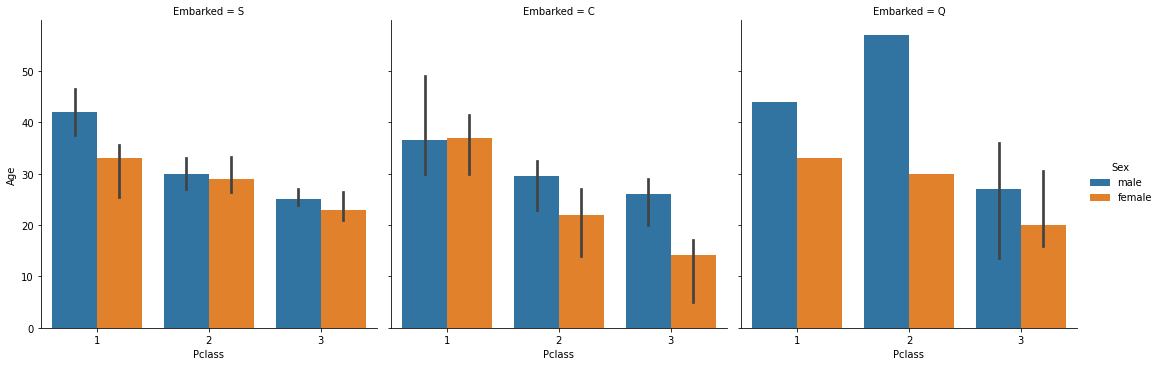

In [1066]:
sns.catplot(data=df,x='Pclass',y='Age',hue='Sex',col='Embarked',kind='bar',estimator=median)

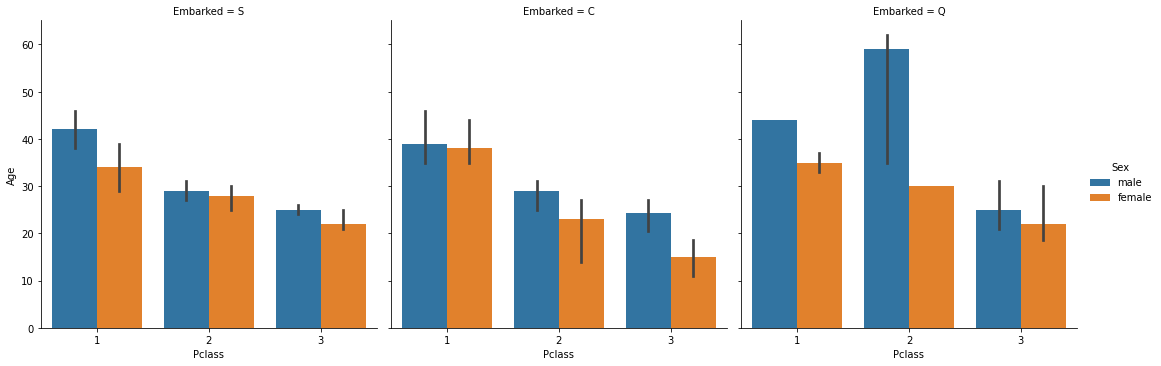

In [1067]:
sns.catplot(data=dft,x='Pclass',y='Age',hue='Sex',col='Embarked',kind='bar',estimator=median)

In [1068]:
filtA1=(df1['Embarked']=='Q') & (df1['Pclass']==1) & (df1['Sex']=='male')

In [1069]:
df1['Age'].loc[filtA1].median()

44.0

In [1070]:
filtA2=(df1['Embarked']=='Q') & (df1['Pclass']==2) & (df1['Sex']=='male')

In [1071]:
df1['Age'].loc[filtA2].mean()

53.75

used a for loop to fill all the nan 

In [1072]:
for e in ['S','Q','C']:
    for p in dft['Pclass'].unique():
        for g in dft['Sex'].unique():
            filt=(dft['Embarked']==e) & (dft['Pclass']==p) & (dft['Sex']==g)
            #print(e,p,g,df1['Age'].loc[filtA3].mean())
            dft['Age'].loc[filt]=dft['Age'].loc[filt].fillna(dft['Age'].loc[filt].mean())
print('loop finished')
            

loop finished


In [1073]:
dft['Age'].isnull().sum()

0

##### FARE

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

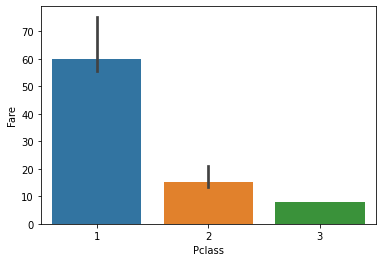

In [1074]:
sns.barplot(data=dft,x='Pclass',y='Fare',estimator=median)

In [1075]:
filt=dft['Fare'].isnull()
dft.loc[filt]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train_marking
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Test


In [1076]:
filt2=dft['Pclass']==3
dft['Fare'].loc[filt2].median()

8.05

In [1077]:
dft['Fare'].loc[filt]=dft['Fare'].loc[filt].fillna(dft['Fare'].loc[filt2].median())

##### EMBARKED

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

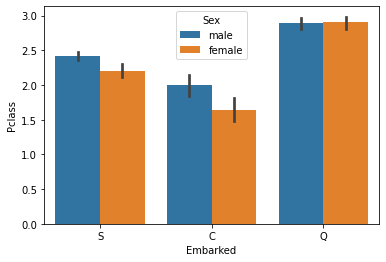

In [1078]:
sns.barplot(data=dft,x='Embarked',y='Pclass',hue='Sex')

In [1079]:
filt3=dft['Embarked'].isnull()
#dft['Embarked'].loc[filt3]=dft['Embarked'].fillna('C')

In [1080]:
dft['Embarked'].loc[filt3]=dft['Embarked'].loc[filt3].fillna('C')

In [1081]:
for i in dft.columns:
    print(i,dft[i].isnull().sum())

index 0
PassengerId 0
Survived 418
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 1014
Embarked 0
Train_marking 0


In [1082]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1309 non-null   int64  
 1   PassengerId    1309 non-null   int64  
 2   Survived       891 non-null    float64
 3   Pclass         1309 non-null   int64  
 4   Name           1309 non-null   object 
 5   Sex            1309 non-null   object 
 6   Age            1309 non-null   float64
 7   SibSp          1309 non-null   int64  
 8   Parch          1309 non-null   int64  
 9   Ticket         1309 non-null   object 
 10  Fare           1309 non-null   float64
 11  Cabin          295 non-null    object 
 12  Embarked       1309 non-null   object 
 13  Train_marking  1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


### LABEL OR ONE HOT ENCODING THE DATA

In [1083]:
Em=pd.get_dummies(dft['Embarked'],drop_first=True)
Em.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [1084]:
Gen=pd.get_dummies(dft['Sex'],drop_first=True)
Gen.head(3)

,male
0,1
1,0
2,0


In [1094]:
dft=pd.concat([dft,Em],axis=1)  #concatinating the encoded dataframe to original df
dft.drop(columns=['Embarked'],inplace=True)

In [1096]:
dft=pd.concat([dft,Gen],axis=1)
dft.drop(columns=['Sex'],inplace=True)

In [1097]:
dft

,index,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Train_marking,Q,S,male
0,0,1,0.0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,Train,0,1,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,Train,0,0,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Train,0,1,0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,Train,0,1,0
4,4,5,0.0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,Train,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",26.146241,0,0,A.5. 3236,8.0500,NaN,Test,0,1,1
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,Test,0,0,0
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Test,0,1,1
1307,416,1308,NaN,3,"Ware, Mr. Frederick",26.146241,0,0,359309,8.0500,NaN,Test,0,1,1


In [1098]:
dft.shape

(1309, 15)

### Checking Correlation to delete highly correclated features3

In [1099]:
dft.corr()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
index,1.000000,0.170654,-0.005007,-0.018212,0.016271,-0.027343,0.003911,-0.003395,-0.045462,0.057565,0.038626
PassengerId,0.170654,1.000000,-0.005007,-0.038354,0.022118,-0.055224,0.008942,0.031029,0.011585,-0.047923,0.013406
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.059674,-0.035322,0.081629,0.257307,0.003650,-0.155660,-0.543351
Pclass,-0.018212,-0.038354,-0.338481,1.000000,-0.444033,0.060832,0.018322,-0.558740,0.230491,0.096335,0.124617
Age,0.016271,0.022118,-0.059674,-0.444033,1.000000,-0.204367,-0.138354,0.194796,-0.057093,-0.026447,0.074937
SibSp,-0.027343,-0.055224,-0.035322,0.060832,-0.204367,1.000000,0.373587,0.160388,-0.048678,0.075198,-0.109609
Parch,0.003911,0.008942,0.081629,0.018322,-0.138354,0.373587,1.000000,0.221668,-0.100943,0.073258,-0.213125
Fare,-0.003395,0.031029,0.257307,-0.558740,0.194796,0.160388,0.221668,1.000000,-0.129922,-0.172884,-0.185744
Q,-0.045462,0.011585,0.003650,0.230491,-0.057093,-0.048678,-0.100943,-0.129922,1.000000,-0.489874,-0.088651
S,0.057565,-0.047923,-0.155660,0.096335,-0.026447,0.075198,0.073258,-0.172884,-0.489874,1.000000,0.119504


<AxesSubplot:>

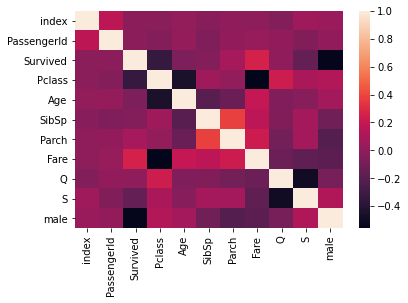

In [1100]:
sns.heatmap(dft.corr())

## Handling Outliers

In [1101]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1309 non-null   int64  
 1   PassengerId    1309 non-null   int64  
 2   Survived       891 non-null    float64
 3   Pclass         1309 non-null   int64  
 4   Name           1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          295 non-null    object 
 11  Train_marking  1309 non-null   object 
 12  Q              1309 non-null   uint8  
 13  S              1309 non-null   uint8  
 14  male           1309 non-null   uint8  
dtypes: float64(3), int64(5), object(4), uint8(3)
memory usage: 126.7+ KB


#### Outlier-Age

In [1102]:
temp=pd.DataFrame()

In [1103]:
temp['Age']=dft['Age']

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

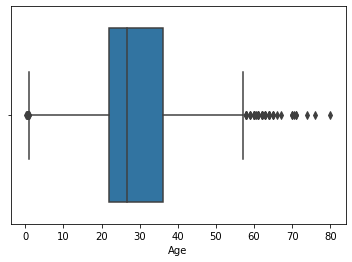

In [1104]:
sns.boxplot(temp['Age'])

In [1105]:
filt6=(temp['Age'] < (temp['Age'].quantile(.95))) & (temp['Age'] > (temp['Age'].quantile(.03)))

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

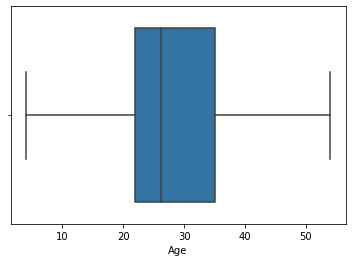

In [1106]:
sns.boxplot(temp['Age'].loc[filt6])

In [1107]:
filt7=(temp['Age'] > (temp['Age'].quantile(.95)))

temp['Age'].loc[filt7]=temp['Age'].quantile(.95)

In [1108]:
filt8=(temp['Age'] < (temp['Age'].quantile(.03)))
temp['Age'].loc[filt8]=temp['Age'].quantile(.03)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

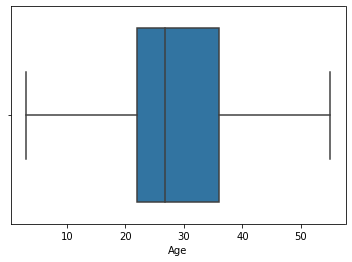

In [1109]:
sns.boxplot(temp['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

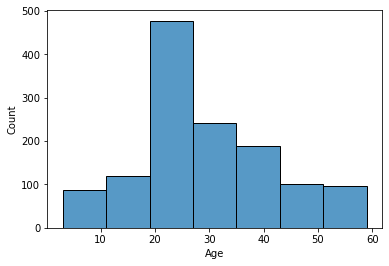

In [1110]:
sns.histplot(temp['Age'],binwidth=8)

reflecting the same to original Df dft

In [1111]:
filt7=(dft['Age'] > (dft['Age'].quantile(.95)))

dft['Age'].loc[filt7]=dft['Age'].quantile(.95)

In [1112]:
filt8=(dft['Age'] < (dft['Age'].quantile(.03)))
dft['Age'].loc[filt8]=dft['Age'].quantile(.03)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

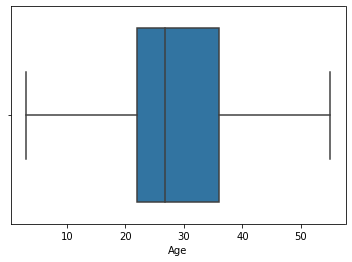

In [1113]:
sns.boxplot(dft['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

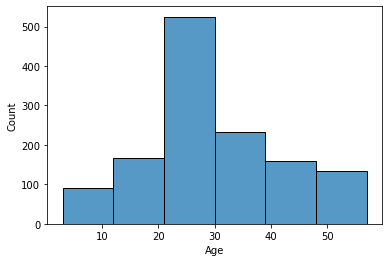

In [1135]:
sns.histplot(dft['Age'],binwidth=9)

##### Outlier -Fare

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

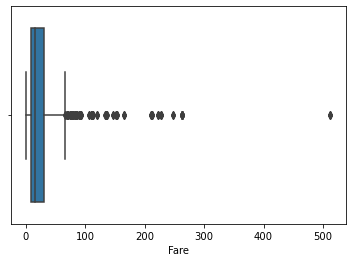

In [1114]:
sns.boxplot(dft['Fare'])

In [1115]:
#reduced the highest five fare 500 (in train and prediction ) to 300.
#the next one is 263 but not filling with 263 value since it has survival 0 , but all the faresabove 500 has survival 1.
#sot to make it unique from 263 the next lowerst fare , decided to replace 500 to fare 300
filt5=dft['Fare']>500
dft['Fare'].loc[filt5] =300

In [1116]:
dft[['Fare','Pclass','Survived']].sort_values(by='Fare',ascending=False)

,Fare,Pclass,Survived
737,300.0,1,1.0
1234,300.0,1,NaN
258,300.0,1,1.0
679,300.0,1,1.0
438,263.0,1,0.0
...,...,...,...
277,0.0,2,0.0
815,0.0,1,0.0
302,0.0,3,0.0
806,0.0,1,0.0


C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

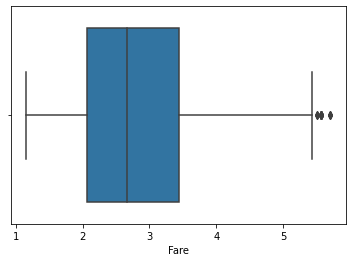

In [1117]:
sns.boxplot(np.log(dft['Fare']))

C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

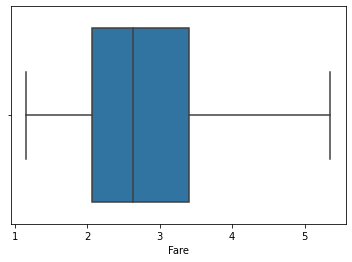

In [1118]:
filt4=(np.log(dft['Fare'])) < (np.log(dft['Fare']).quantile(.98))
sns.boxplot(np.log(dft['Fare']).loc[filt4])

In [1119]:
dft['Fare_log']=np.log(dft['Fare'])

C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_log'>

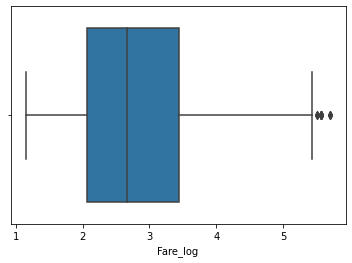

In [1120]:
sns.boxplot(dft['Fare_log'])

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_log'>

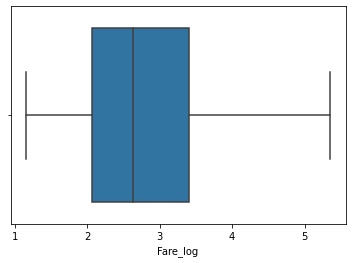

In [1121]:
#checking which percentile above value need change to avoid outlier 
filt4=(dft['Fare_log']) < dft['Fare_log'].quantile(.98) 
sns.boxplot(dft['Fare_log'].loc[filt4])

In [1122]:
#replacing that value to handle outlier
filt5=(dft['Fare_log']) > dft['Fare_log'].quantile(.98)
dft['Fare_log'].loc[filt5]=dft['Fare_log'].quantile(.98)
print('code run')

code run


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_log'>

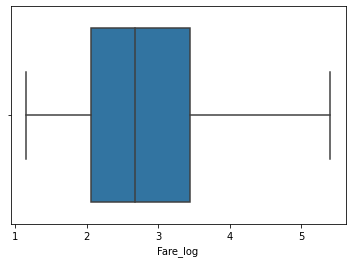

In [1123]:
sns.boxplot(dft['Fare_log'])

In [1124]:
dft.drop(columns=['Fare'],inplace=True) #drop the fare column

In [1143]:
#replace the -infinitve with lowest value above infinitive
filt=dft['Fare_log'] <1.15
dft['Fare_log'].loc[filt]=1.15

In [1125]:
dft.head()

,index,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Cabin,Train_marking,Q,S,male,Fare_log
0,0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,NaN,Train,0,1,1,1.981001
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,C85,Train,0,0,0,4.266662
2,2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,NaN,Train,0,1,0,2.070022
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,C123,Train,0,1,0,3.972177
4,4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,NaN,Train,0,1,1,2.085672


### To check the Gaussian Distribution

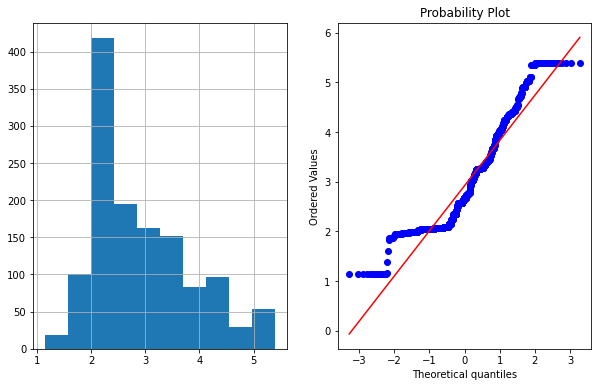

In [1151]:
Gaus_check(dft,'Fare_log')

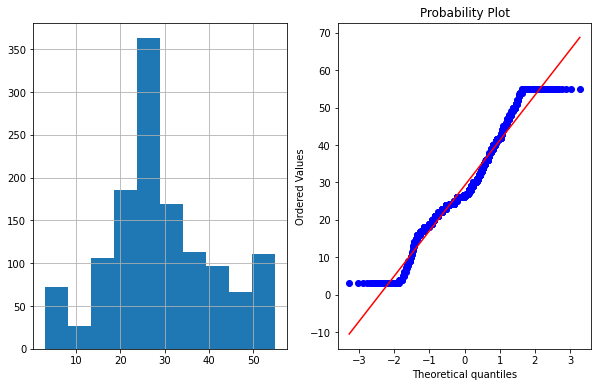

In [1152]:
Gaus_check(dft,'Age')

## SPLITING BACK TRAIN AND PREDICITON DATA 

In [1160]:
filt9=dft['Train_marking']=='Train'
filt10=dft['Train_marking'] !='Train'
dftest=dft.loc[filt10]
dftrain=dft.loc[filt9]

In [1161]:
dftrain.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Train_marking', 'Q', 'S', 'male',
       'Fare_log'],
      dtype='object')

In [1162]:
X=dftrain[[ 'Pclass', 'Age', 'SibSp','Parch', 'Q', 'S', 'male','Fare_log']]  # X data created  to train

In [1163]:
X_predict = dftest[[ 'Pclass', 'Age', 'SibSp','Parch', 'Q', 'S', 'male','Fare_log']] #X for prediction

In [1164]:
y=dftrain['Survived'] # y target

In [1165]:
X.describe()

,Pclass,Age,SibSp,Parch,Q,S,male,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.028260,0.523008,0.381594,0.086420,0.722783,0.647587,2.908883
std,0.836071,12.393757,1.102743,0.806057,0.281141,0.447876,0.477990,0.944138
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150000
25%,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.068177
50%,3.000000,26.738095,0.000000,0.000000,0.000000,1.000000,1.000000,2.670985
75%,3.000000,36.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.433987
max,3.000000,55.000000,8.000000,6.000000,1.000000,1.000000,1.000000,5.401682


#### Train Test Split

In [1166]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

## Apply Algo

### Poly L2

too many features so not considering

In [1232]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) 
X_poly2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y,random_state = 0)
logpoly=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=100.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
logpoly.fit(X_train,y_train)
pred_poly= logpoly.predict(X_test)
#r2_score(y_test,pred_poly)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1233]:
print(logpoly.score(X_test,y_test))
print(logpoly.score(X_train,y_train))

0.8251121076233184
0.842814371257485


In [1353]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_poly2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y,random_state = 0)
logpoly=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=100.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
logpoly.fit(X_train,y_train)
pred_poly= logpoly.predict(X_test)
#r2_score(y_test,pred_poly)

In [1354]:
print(logpoly.score(X_test,y_test))
print(logpoly.score(X_train,y_train))

0.8071748878923767
0.8308383233532934


In [1357]:
pd.DataFrame(X_poly2).shape

(891, 45)

In [1204]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       139
         1.0       0.78      0.74      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



## SVC

Optimizing SVC with Grid Search

In [1179]:
clf_svc=svm.SVC(C=10000,gamma=10)
clf_svc.fit(X_train,y_train)

SVC(C=10000, gamma=10)

In [1180]:
pred_clf_svc=clf_svc.predict(X_test)
print(classification_report(y_test,pred_clf_svc))

              precision    recall  f1-score   support

         0.0       0.66      0.95      0.78       110
         1.0       0.75      0.22      0.34        69

    accuracy                           0.67       179
   macro avg       0.71      0.59      0.56       179
weighted avg       0.69      0.67      0.61       179



In [1181]:
clf_svc.score(X_train,y_train)

0.973314606741573

In [1182]:
clf_svc.score(X_test,y_test)

0.6703910614525139

### Logistic with L2

In [1191]:


clf_log = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=10.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
clf_log.fit(X_train, y_train)

print(clf_log.score(X_test,y_test))
print(clf_log.score(X_train,y_train))
#print(classification_report(y_test,y_predict))

0.8156424581005587
0.8075842696629213


### Logistic with L1 

In [1209]:


clf_log = LogisticRegression(penalty='l1',dual=False,tol=0.0001,C=10.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='saga', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
clf_log.fit(X_train, y_train)

print(clf_log.score(X_test,y_test))
print(clf_log.score(X_train,y_train))
#print(classification_report(y_test,y_predict))

0.7982062780269058
0.7739520958083832


##### Optimization Methods for Logistic

In [1192]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [1194]:
clf_log.fit(X_train_std, y_train)

LogisticRegression(C=10.0, max_iter=10000)

In [1195]:
print(clf_log.score(X_test_std,y_test))
print(clf_log.score(X_train_std,y_train))

0.8156424581005587
0.8075842696629213


### Poly with L1

In [1210]:


poly = PolynomialFeatures(degree=4) 
X_poly2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y,random_state = 0)
logpoly=LogisticRegression(penalty='l1',dual=False,tol=0.0001,C=10.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='saga', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
logpoly.fit(X_train,y_train)
pred_poly= logpoly.predict(X_test)
#r2_score(y_test,pred_poly)

In [1211]:
print(logpoly.score(X_test,y_test))
print(logpoly.score(X_train,y_train))

0.7982062780269058
0.7739520958083832


In [1204]:
print(classification_report(y_test,pred_poly))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       139
         1.0       0.78      0.74      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



### Ada Boost

In [1215]:

clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)

clf_ab.fit(X_train, y_train)

print(clf_ab.score(X_train, y_train))
print(clf_ab.score(X_test, y_test))

0.9236526946107785
0.8385650224215246


### Ransom Forest

In [1406]:
cls_rf= RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=4,random_state=0)

In [1407]:
cls_rf.fit(X_train, y_train)

print(cls_rf.score(X_test,y_test))
print(cls_rf.score(X_train,y_train))

0.8565022421524664
0.9431137724550899


### Decision Tree

In [1230]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                              max_features=None, random_state=None, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)

In [1231]:

clf_dt.fit(X_train, y_train)

print(clf_dt.score(X_test,y_test))
print(clf_dt.score(X_train,y_train))

0.7937219730941704
0.9805389221556886


#### Post Pruning using Cost complexity 

In [1409]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [1410]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 9.98003992e-05, 1.24750499e-04,
       1.63957799e-04, 2.26819089e-04, 3.24351297e-04, 4.99001996e-04,
       4.99001996e-04, 5.98802395e-04, 6.54940120e-04, 7.04473406e-04,
       7.48502994e-04, 7.48502994e-04, 8.98203593e-04, 9.07276356e-04,
       9.82162659e-04, 9.98003992e-04, 9.98003992e-04, 9.98003992e-04,
       9.98003992e-04, 9.98003992e-04, 1.12275449e-03, 1.12275449e-03,
       1.19760479e-03, 1.19775131e-03, 1.28314799e-03, 1.28314799e-03,
       1.28314799e-03, 1.30988024e-03, 1.31972896e-03, 1.33067199e-03,
       1.33661249e-03, 1.33661249e-03, 1.34730539e-03, 1.37470158e-03,
       1.39720559e-03, 1.40344311e-03, 1.43496790e-03, 1.45022455e-03,
       1.54656902e-03, 1.79640719e-03, 1.79640719e-03, 1.82492159e-03,
       1.99529257e-03, 2.02095808e-03, 2.15744981e-03, 2.24550898e-03,
       2.28115198e-03, 2.28115198e-03, 2.33217775e-03, 2.42372398e-03,
       2.47666432e-03, 2.61976048e-03, 2.75585193e-03, 2.78673422e-03,
      

In [1411]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15370852845705618


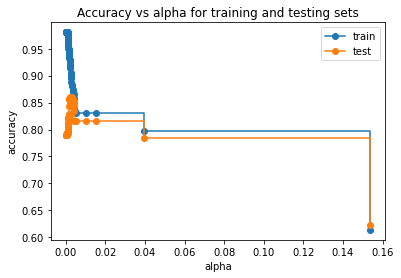

In [1412]:
#Select the best alpha value with the test and train score by below plot
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [1414]:

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.03)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.8161434977578476
0.8308383233532934


 ## PCA poly

In [ ]:
poly = PolynomialFeatures(degree=4) 
X_poly2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y,random_state = 0)

In [1324]:
pd.DataFrame(X_poly2).shape

(891, 495)

In [1251]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [1345]:
pca = PCA(n_components=35)

In [1346]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [1347]:

logpoly=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=100.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=10000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)

In [1348]:
logpoly.fit(X_train_pca,y_train)

LogisticRegression(C=100.0, max_iter=10000)

In [1349]:
print(logpoly.score(X_test_pca,y_test))
print(logpoly.score(X_train_pca,y_train))

0.8161434977578476
0.8338323353293413


In [1350]:
print(pca.explained_variance_ratio_)

[0.25736405 0.14599931 0.10365928 0.0919095  0.0638069  0.06112199
 0.05016138 0.04262717 0.0250258  0.02126442 0.01581702 0.01527284
 0.01383421 0.01163985 0.01070134 0.00738553 0.00600464 0.00582145
 0.00557301 0.00481898 0.00418507 0.0038768  0.00323493 0.00301284
 0.00274344 0.0023891  0.00210684 0.00199648 0.00146774 0.00130101
 0.00112244 0.00096011 0.00091647 0.00084978 0.00082694]


### PCA  RF

In [1417]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [1418]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [1449]:
pca = PCA(n_components=6)

In [1450]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [1451]:
cls_rf= RandomForestClassifier(n_estimators=100,max_depth=12, min_samples_split=4,random_state=0)

In [1452]:
cls_rf.fit(X_train_pca, y_train)

print(cls_rf.score(X_test_pca,y_test))
print(cls_rf.score(X_train_pca,y_train))

0.820627802690583
0.9700598802395209


### PCA Ada Boost

In [1456]:
pca = PCA(n_components=7)

In [1457]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [1460]:
def pca_ada(pca):
    pca = PCA(n_components=pca)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)

    clf_ab.fit(X_train_pca, y_train)

    print('train For n',pca,(clf_ab.score(X_train_pca, y_train)))
    print('test for n',pca,(clf_ab.score(X_test_pca, y_test)))

In [1463]:
for i in range(1,8):
    pca_ada(i)

train For n PCA(n_components=1) 0.7529940119760479
test for n PCA(n_components=1) 0.6860986547085202
train For n PCA(n_components=2) 0.8023952095808383
test for n PCA(n_components=2) 0.726457399103139
train For n PCA(n_components=3) 0.8458083832335329
test for n PCA(n_components=3) 0.7847533632286996
train For n PCA(n_components=4) 0.875748502994012
test for n PCA(n_components=4) 0.8161434977578476
train For n PCA(n_components=5) 0.8802395209580839
test for n PCA(n_components=5) 0.7937219730941704
train For n PCA(n_components=6) 0.8787425149700598
test for n PCA(n_components=6) 0.7892376681614349
train For n PCA(n_components=7) 0.8967065868263473
test for n PCA(n_components=7) 0.7892376681614349


In [1475]:
pca_ada(4)

train For n PCA(n_components=4) 0.875748502994012
test for n PCA(n_components=4) 0.8161434977578476


### PCA_SVC

In [1472]:
def pca_svc(pca):
    pca = PCA(n_components=pca)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    clf_svc=svm.SVC(C=1000,gamma=10)
    clf_svc.fit(X_train_pca,y_train)
    print('train For n',pca,(clf_svc.score(X_train_pca, y_train)))
    print('test for n',pca,(clf_svc.score(X_test_pca, y_test)))

In [1473]:
for i in range(1,9):
    pca_svc(i)

train For n PCA(n_components=1) 0.7395209580838323
test for n PCA(n_components=1) 0.7085201793721974
train For n PCA(n_components=2) 0.9266467065868264
test for n PCA(n_components=2) 0.726457399103139
train For n PCA(n_components=3) 0.9476047904191617
test for n PCA(n_components=3) 0.7354260089686099
train For n PCA(n_components=4) 0.9491017964071856
test for n PCA(n_components=4) 0.7443946188340808
train For n PCA(n_components=5) 0.9610778443113772
test for n PCA(n_components=5) 0.6995515695067265
train For n PCA(n_components=6) 0.9610778443113772
test for n PCA(n_components=6) 0.695067264573991
train For n PCA(n_components=7) 0.9610778443113772
test for n PCA(n_components=7) 0.695067264573991
train For n PCA(n_components=8) 0.9670658682634731
test for n PCA(n_components=8) 0.6860986547085202


In [1474]:
pca_svc(4)

train For n PCA(n_components=4) 0.9491017964071856
test for n PCA(n_components=4) 0.7443946188340808


## Prediction

In [ ]:
y_pred=model.predict()
y_pred
submission=pd.DataFrame({"PassengerId" : test['PassengerId'],"Survived" :y_pred})
submission.to_csv("titanic.csv",index=False)